In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set(color_codes=True)

In [2]:
# 1) LOAD DATASET
whole_df = pd.read_csv('diabetes.csv')
whole_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# 2) STRUCTURE OF DATASET
whole_df.shape
#The dataset contains 768 rows and 9 columns excluding index

(768, 9)

In [7]:
whole_df.info()
#As seen there are no Null values and datatype is properly mapped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


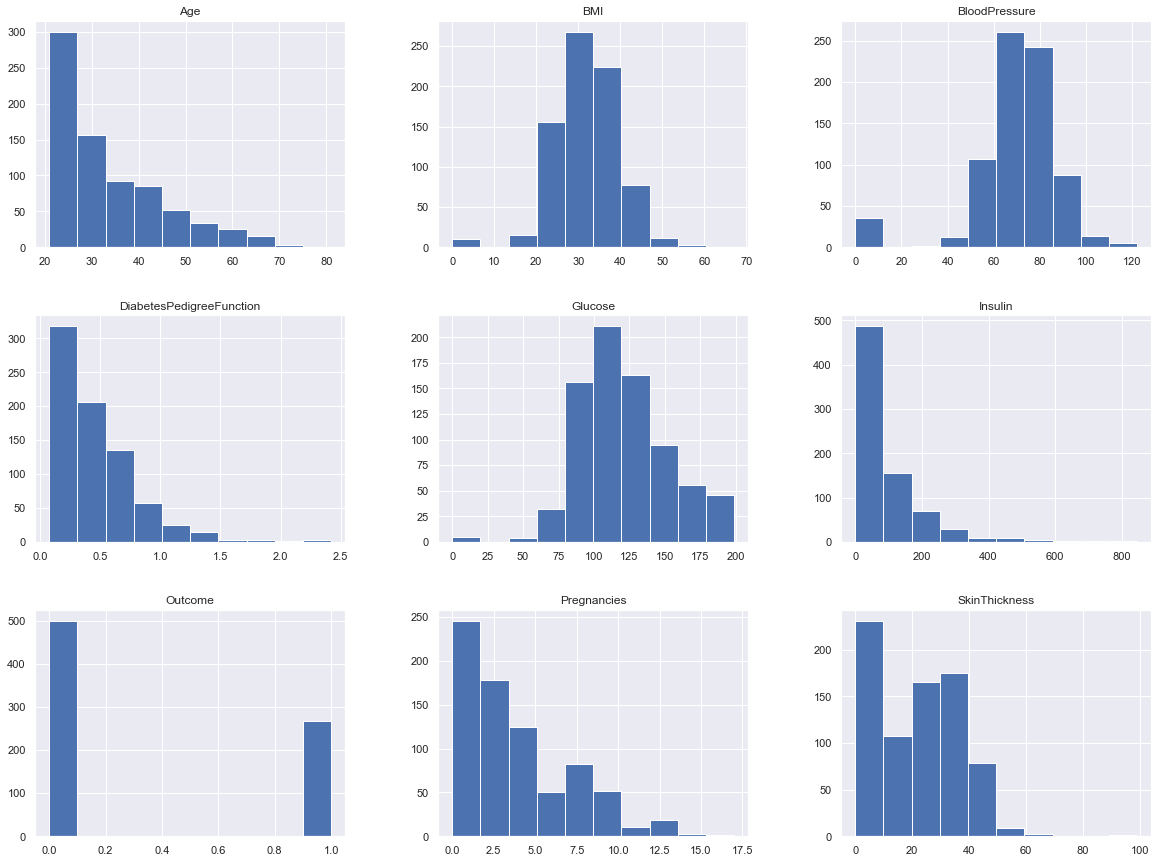

In [9]:
whole_df.hist(figsize=(20, 15))
plt.show()

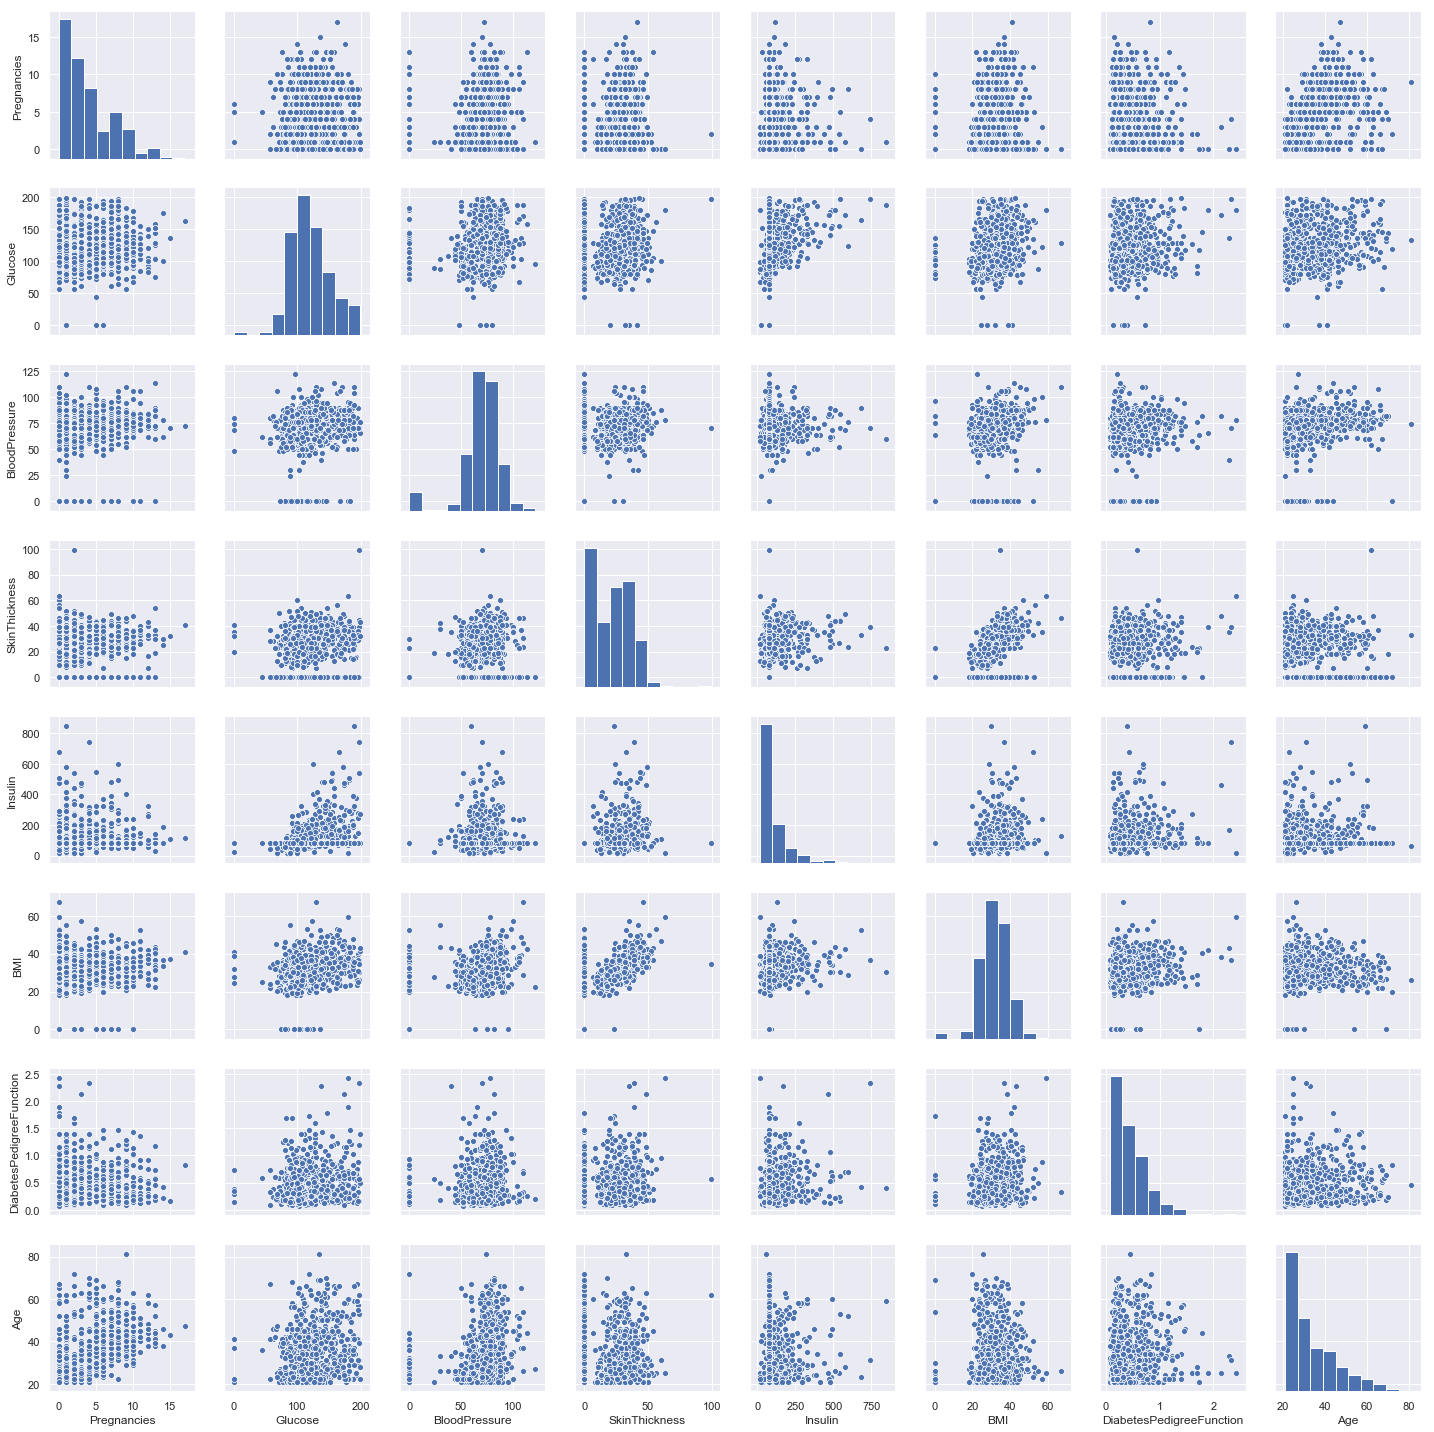

In [15]:
# 3) PLOT GRAPHS

##Since some patient's Insulin is 0 in the set, 0 values should be handled for optimum results
## We can remove the rows containing 0's in Insulin but that would lead to loss of data
##Replacing the zero values in the row 'Insulin' with mean value. 
##But this is not the best practice in this aspect since this dataset is related to health diagnostics and assumptions cannot be made.

#mean_insulin=whole_df['Insulin'].mean()
#insulin_df=whole_df[whole_df['Insulin']!=0]
mean_insulin=whole_df['Insulin'].mean()
whole_df['Insulin']=whole_df['Insulin'].replace(0,mean_insulin)
sns.pairplot(data=whole_df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
plt.show()

#As seen in the pairplot there is not commendable relation between values except the relation between BMI and Skin Thickness

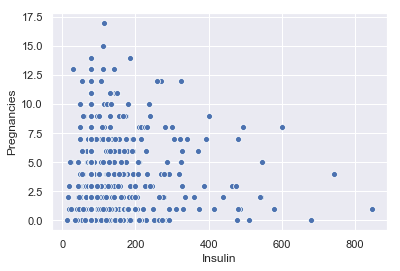

In [9]:
sns.scatterplot(x=whole_df['Insulin'],y=whole_df['Pregnancies'])
plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


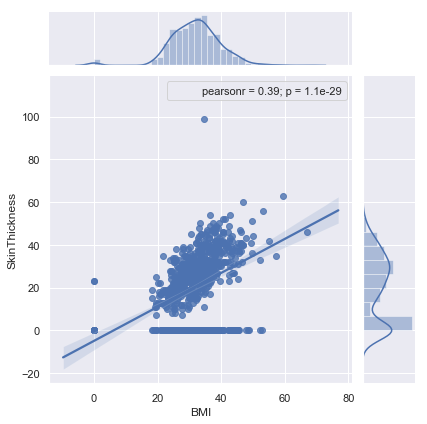

In [10]:
sns.jointplot(whole_df['BMI'],whole_df['SkinThickness'],kind="reg").annotate(stats.pearsonr)
plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


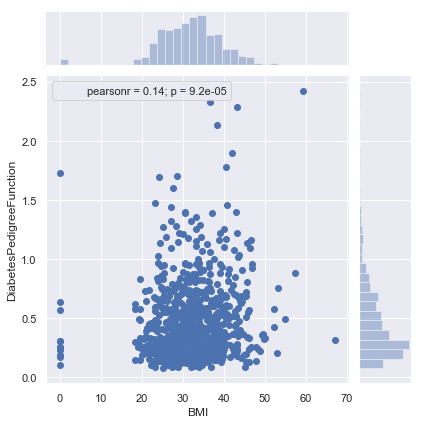

In [11]:
sns.jointplot(whole_df['BMI'],whole_df['DiabetesPedigreeFunction']).annotate(stats.pearsonr)
plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


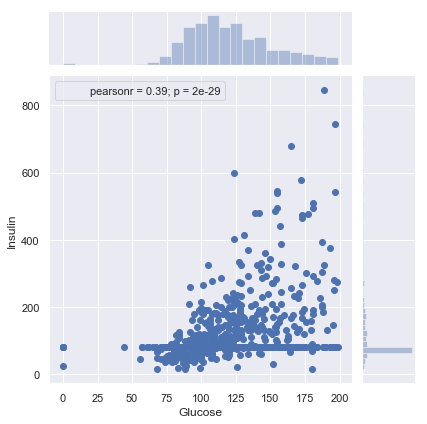

In [12]:
sns.jointplot(whole_df['Glucose'],whole_df['Insulin']).annotate(stats.pearsonr)
plt.show()

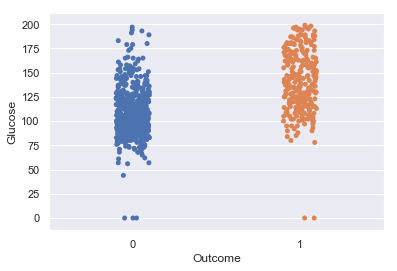

In [8]:
sns.stripplot(whole_df['Outcome'],whole_df['Glucose'])
plt.show()

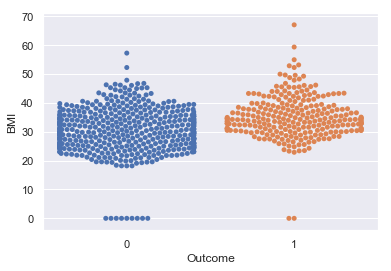

In [33]:
sns.swarmplot(whole_df['Outcome'],whole_df['BMI'])
plt.show()

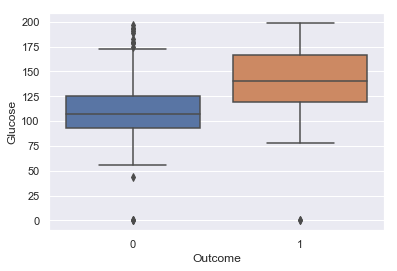

In [35]:
sns.boxplot(whole_df['Outcome'],whole_df['Glucose'])
plt.show()
#As seen in the Box plot, ladies with Glucose level in the range 80-120 are not affected by Diabetes (1)
#And ladies with Glucose content above 120 are most likely to be affected by Diabetes

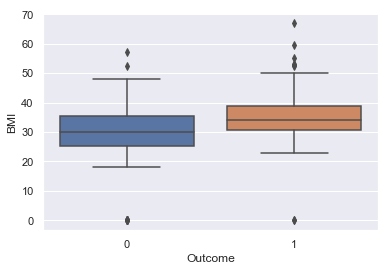

In [15]:
sns.boxplot(whole_df['Outcome'],whole_df['BMI'])
plt.show()

In [33]:
whole_df.describe()
#whole_df['Outcome'].value_counts()

# 4) DESCRIPTIVE ANALYSIS ON 'GLUCOSE'
# Mean = 120.89 :- Average Glucose content is 120.89
# Standard Deviation = 31.97 :- Average variation of the glucose values from the mean glucose value is 31.97
#                               i.e Glucose value is most likely to be in the range of 120.89(+or-)31.97
# 25% = 99 :- 25 percentage of the people have glucose content within 99
# 50% = 117 :- 50 percentage of the people have glucose content within 117
# 75% = 140 :- 75 percentage of the people have glucose content within 140

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,118.660163,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,93.080358,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
ct=pd.crosstab(whole_df['Outcome'],whole_df['Pregnancies'])
ct

Pregnancies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
Outcome,,,,,,,,,,,,,,,,,
0,73,106,84,48,45,36,34,20,16,10,14,4,5,5,0,0,0
1,38,29,19,27,23,21,16,25,22,18,10,7,4,5,2,1,1


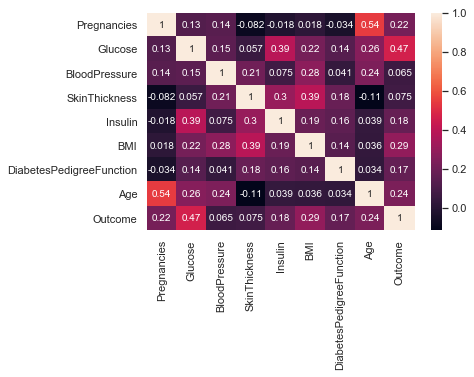

In [16]:
# 5) INFERRELATIONSHIP BETWEEN VARIOUS ATTRIBUTES
corr=whole_df.corr()
corr
sns.heatmap(corr,annot=True)
plt.show()
#As seen below
#Outcome is nearly 50% affected by Glucose
#Glucose is affected by Insulin by 40%
#Insulin is 30% affected by Skin Thickness
#Skin thuckness is 40% affected by BMI

In [10]:
# 6) INFERENCES :
# Each and every attribute is inter-related which means we cannot ignore any attribute.
# Outcome almost 50% depends on the Glucose content of the patient
# Skin thickness and Age attributes are inversely proportional (Correlation factor = -0.11)
# Outcome is directly proportional to all the other attributes.